In [52]:
#
# Final Frontier 2 - Dan C.
# 
# Liverpool V Manchester United
# Query and Regression analysis of Bookie odds
# for Home vs Away performance
#
# Utilizing AWS RDS with PostgreSQL instance of 
# the Kaggle European Soccer Database
# https://www.kaggle.com/hugomathien/soccer

import pandas as pd
import psycopg2
from sqlalchemy import create_engine

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [53]:
# AWS RDS PostgreSQL Database Creation
#
# I converted the sqlite db to a postgresdb
# Method used: export all the data as csv files / table
# Analyze the Data Definition Language of the SQLITE and relations
# Transpose the SQLITE DDL To Postgres, Add relations, Create Postgres DB
# Re-import CSV files.  
# Dump database and it can be restored to the AWS RDS Postgres instance as final-frontier2
#

engine = psycopg2.connect(                               
    database="final-frontier2",
    user="postgres",
    password="TypicalParkerLuck",
    host="final-frontier.czribcwnemzt.us-east-1.rds.amazonaws.com",
    port='5432',
    connect_timeout=3)
cursor = engine.cursor()

In [54]:
liv_home_Query = "select b365h,b365d,b365a,bwh, bwd, bwa, iwh, iwd, iwa, lbh, lbd, lba, whh, whd, wha, vch, vcd, vca, home_team_goal, away_team_goal \
  from match where ((home_team_api_id = 8650) and (away_team_api_id = 10260))" 
cursor.execute(liv_home_Query)
liv_home_results = cursor.fetchall()
liv_home_results_pd = pd.DataFrame(liv_home_results,columns=['b365h','b365d','b365a','bwh','bwd', 'bwa', 'iwh', 'iwd', 'iwa', 'lbh', 'lbd', 'lba', 'whh', \
                                                     'whd', 'wha', 'vch', 'vcd', 'vca' ,'home_team_goal', 'away_team_goal'])

liv_odds_pd = liv_home_results_pd[['b365h','b365d','b365a','bwh','bwd', 'bwa', 'iwh', 'iwd', 'iwa', 'lbh', 'lbd', 'lba', 'whh', 'whd', 'wha', 'vch', 'vcd', 'vca']]
liv_odds_HOME = liv_odds_pd[['b365h','bwh', 'iwh', 'lbh', 'whh', 'vch']]
liv_odds_DRAW = liv_odds_pd[['b365d','bwd', 'iwd', 'lbd', 'whd', 'vcd']]
liv_odds_AWAY = liv_odds_pd[['b365a','bwa', 'iwa', 'lba', 'wha', 'vca']]
liv_odds_AWAY

,b365a,bwa,iwa,lba,wha,vca
0,2.6,2.4,2.6,2.5,2.5,2.5
1,2.4,2.55,2.5,2.5,2.5,2.5
2,2.6,2.55,2.3,2.5,2.5,2.6
3,2.4,2.35,2.4,2.5,2.5,2.5
4,2.63,2.6,2.45,2.25,2.8,2.75
5,2.88,2.65,2.6,2.62,2.8,2.88
6,3.6,3.6,3.2,3.6,3.5,3.8
7,3.5,3.5,2.75,3.3,3.1,3.2


In [55]:
man_home_Query = "select b365h,b365d,b365a,bwh, bwd, bwa, iwh, iwd, iwa, lbh, lbd, lba, whh, whd, wha, vch, vcd, vca, home_team_goal, away_team_goal \
  from match where ((home_team_api_id = 10260) and (away_team_api_id = 8650))"
cursor.execute(man_home_Query)
man_home_results = cursor.fetchall()
man_home_results_pd = pd.DataFrame(man_home_results,columns=['b365h','b365d','b365a','bwh','bwd', 'bwa', 'iwh', 'iwd', 'iwa', 'lbh', 'lbd', 'lba', 'whh', \
                                                     'whd', 'wha', 'vch', 'vcd', 'vca' ,'home_team_goal', 'away_team_goal'])

man_odds_pd = man_home_results_pd[['b365h','b365d','b365a','bwh','bwd', 'bwa', 'iwh', 'iwd', 'iwa', 'lbh', 'lbd', 'lba', 'whh', 'whd', 'wha', 'vch', 'vcd', 'vca']]
man_odds_HOME = man_odds_pd[['b365h','bwh', 'iwh', 'lbh', 'whh', 'vch']]
man_odds_DRAW = man_odds_pd[['b365d','bwd', 'iwd', 'lbd', 'whd', 'vcd']]
man_odds_AWAY = man_odds_pd[['b365a','bwa', 'iwa', 'lba', 'wha', 'vca']]
man_odds_AWAY

,b365a,bwa,iwa,lba,wha,vca
0,4.5,4.1,4,4,4.33,4
1,5.5,5,4.9,5,5.5,5.5
2,5.5,5,4.3,5,5.5,5.5
3,4.33,4.4,4,4.2,4,4.33
4,4.2,4.1,4.3,4,4,4.3
5,2.9,2.8,2.75,2.8,3,3
6,4.75,4.5,4.2,4.33,4.5,4.6
7,4.33,4.33,4,4.2,4.5,4.33


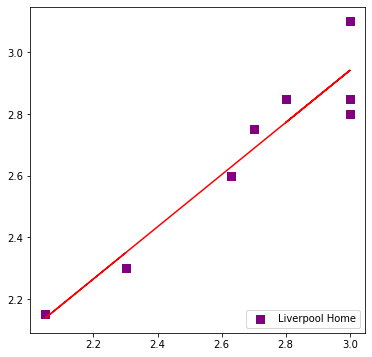

In [56]:
Xlh = liv_odds_HOME.iloc[:, 0].to_numpy().reshape(-1, 1)        # values converts it into a numpy array
Ylh = liv_odds_HOME.iloc[:, 1].to_numpy().reshape(-1, 1)        # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()                       # create object for the class
reg = linear_regressor.fit(Xlh, Ylh)                              # perform linear regression
Ylh_pred = linear_regressor.predict(Xlh)                    # make predictions
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(Xlh, Ylh, s=50, c = 'purple',marker="s", label='Liverpool Home')
plt.plot(Xlh, Ylh_pred, c ='red')
plt.legend(loc='lower right');
plt.show()

In [57]:
reg.score(Xlh,Ylh)

0.9024452048787727

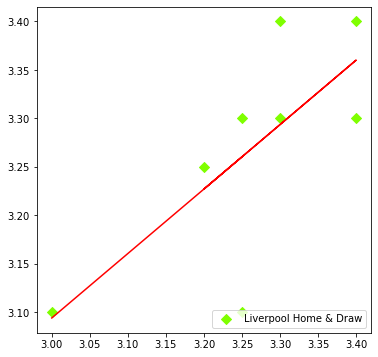

In [58]:
Xld = liv_odds_DRAW.iloc[:, 0].to_numpy().reshape(-1, 1)        # values converts it into a numpy array
Yld = liv_odds_DRAW.iloc[:, 1].to_numpy().reshape(-1, 1)        # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()                       # create object for the class
reg = linear_regressor.fit(Xld, Yld)                              # perform linear regression
Yld_pred = linear_regressor.predict(Xld)                    # make predictions
plt.scatter(Xld, Yld, s=50, c = "chartreuse",marker="D", label='Liverpool Home & Draw')
plt.plot(Xld, Yld_pred, c ='red')
#plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc='lower right');
plt.show()

In [59]:
reg.score(Xld,Yld)

0.5309904616835306

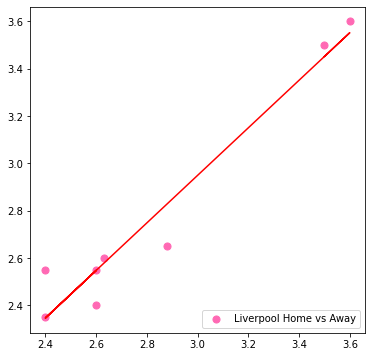

In [60]:
Xla = liv_odds_AWAY.iloc[:, 0].to_numpy().reshape(-1, 1)        # values converts it into a numpy array
Yla = liv_odds_AWAY.iloc[:, 1].to_numpy().reshape(-1, 1)        # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()                       # create object for the class
reg = linear_regressor.fit(Xla, Yla)                              # perform linear regression
Yla_pred = linear_regressor.predict(Xla)                    # make predictions
plt.scatter(Xla, Yla, s=50, c = 'hotpink',marker="o", label='Liverpool Home vs Away')
plt.plot(Xla, Yla_pred, c ='red')
plt.legend(loc='lower right');
plt.show()

In [61]:
reg.score(Xla,Yla)

0.940148180824

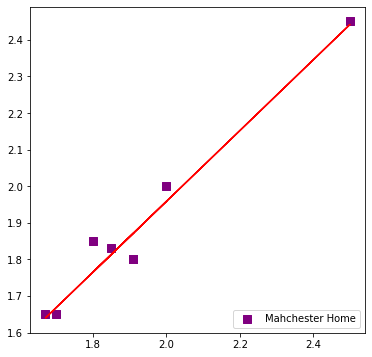

In [62]:
Xmh = man_odds_HOME.iloc[:, 0].to_numpy().reshape(-1, 1)        # values converts it into a numpy array
Ymh = man_odds_HOME.iloc[:, 1].to_numpy().reshape(-1, 1)        # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()                       # create object for the class
reg = linear_regressor.fit(Xmh, Ymh)                              # perform linear regression
Ymh_pred = linear_regressor.predict(Xmh)                    # make predictions
plt.scatter(Xmh, Ymh, s=50, c = 'purple', marker="s", label='Mahchester Home')
plt.plot(Xmh, Ymh_pred, c='red')
plt.legend(loc='lower right');
plt.show()

In [63]:
reg.score(Xmh,Ymh)

0.9567849875180366

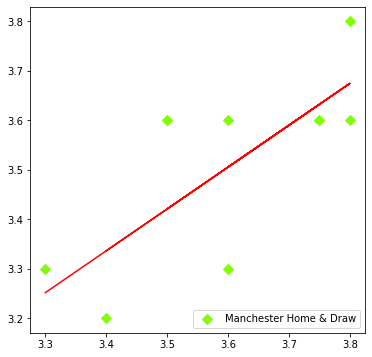

In [64]:
Xmd = man_odds_DRAW.iloc[:, 0].to_numpy().reshape(-1, 1)        # values converts it into a numpy array
Ymd = man_odds_DRAW.iloc[:, 1].to_numpy().reshape(-1, 1)        # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()                       # create object for the class
reg = linear_regressor.fit(Xmd, Ymd)                              # perform linear regression
Ymd_pred = linear_regressor.predict(Xmd)                    # make predictions
plt.scatter(Xmd, Ymd, s=50, c = 'chartreuse',marker="D", label='Manchester Home & Draw')
plt.plot(Xmd, Ymd_pred, c ='red')
plt.legend(loc='lower right');
plt.show()

In [65]:
reg.score(Xmd,Ymd)

0.5784086021505376

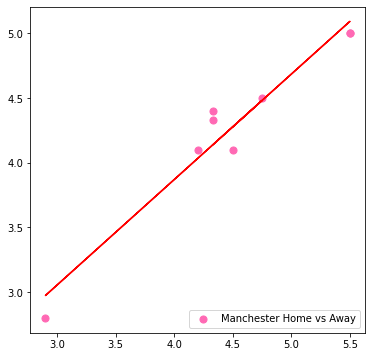

In [66]:
Xma = man_odds_AWAY.iloc[:, 0].to_numpy().reshape(-1, 1)        # values converts it into a numpy array
Yma = man_odds_AWAY.iloc[:, 1].to_numpy().reshape(-1, 1)        # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()                       # create object for the class
reg = linear_regressor.fit(Xma, Yma)                              # perform linear regression
Yma_pred = linear_regressor.predict(Xma)                    # make predictions
plt.scatter(Xma, Yma, s=50, c = 'hotpink',marker="o", label='Manchester Home vs Away')
plt.plot(Xma, Yma_pred, c='red')
plt.legend(loc='lower right');
plt.show()

In [67]:
reg.score(Xma,Yma)

0.9439403634306655

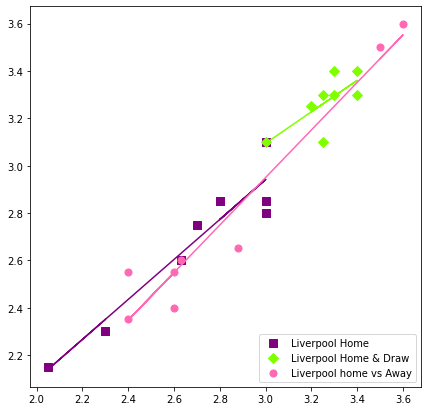

In [68]:
# Plot the Liverpoos @ Home odds regressions
plt.rcParams["figure.figsize"] = (7,7)
plt.scatter(Xlh, Ylh, s=50, c='purple', marker="s", label='Liverpool Home')
plt.scatter(Xld,Yld, s=50, c='chartreuse', marker="D", label='Liverpool Home & Draw')
plt.scatter(Xla,Yla, s=50, c='hotpink', marker="o", label='Liverpool home vs Away')
plt.plot(Xlh, Ylh_pred, c='purple')
plt.plot(Xld, Yld_pred, c='chartreuse')
plt.plot(Xla, Yla_pred, c='hotpink')
plt.legend(loc='lower right');
plt.show()

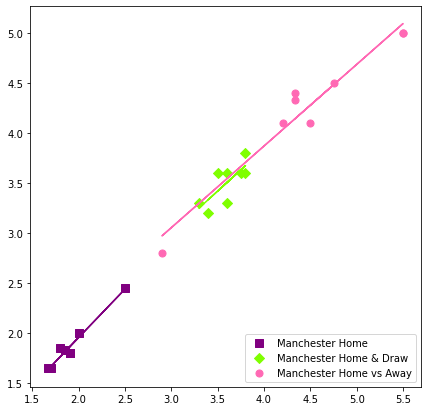

In [69]:
plt.rcParams["figure.figsize"] = (7,7)
plt.scatter(Xmh, Ymh, s=50, c='purple', marker="s", label='Manchester Home')
plt.scatter(Xmd,Ymd, s=50, c='chartreuse', marker="D", label='Manchester Home & Draw')
plt.scatter(Xma,Yma, s=50, c='hotpink', marker="o", label='Manchester Home vs Away')
plt.plot(Xmh, Ymh_pred, c='purple')
plt.plot(Xmd, Ymd_pred, c='chartreuse')
plt.plot(Xma, Yma_pred, c='hotpink')
plt.legend(loc='lower right');
plt.show()